In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pathlib import Path
import warnings
import os

# Suppress warnings
warnings.filterwarnings('ignore')

# --- PATH CONFIGURATION ---
BASE_DIR = Path("./PS2-SIH25").resolve()
DATA_DIR = BASE_DIR / "Data_SIH_2025 2"
ARTIFACT_DIR = Path("artifacts/xgb_models-2.0")
ARTIFACT_DIR.mkdir(parents=True, exist_ok=True)

# --- MODEL CONFIGURATION ---
TARGETS = ['O3_target', 'NO2_target']
LAGS = [1, 2, 3, 6, 12, 24]

FORECAST_FEATURES = [
    'O3_forecast', 'NO2_forecast', 'T_forecast', 'q_forecast',
    'u_forecast', 'v_forecast', 'w_forecast'
]

XGB_PARAMS = {
    'n_estimators': 1000,
    'learning_rate': 0.05,
    'max_depth': 8,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'reg:squarederror',
    'n_jobs': -1,
    'early_stopping_rounds': 50,
    'random_state': 42
}

print("✅ Configuration Loaded.")
print(f"📂 Data Directory: {DATA_DIR}")
print(f"📂 Artifacts Directory: {ARTIFACT_DIR}")

✅ Configuration Loaded.
📂 Data Directory: /content/PS2-SIH25/Data_SIH_2025 2
📂 Artifacts Directory: artifacts/xgb_models


In [ ]:
def create_lag_features(df, targets, lags):
    """Creates lagged features for the target variables."""
    df_lagged = df.copy()
    for target in targets:
        for lag in lags:
            df_lagged[f'{target}_lag_{lag}'] = df_lagged[target].shift(lag)
    return df_lagged

def R2_SAFE(r2):
    """Clamps R2 to -1.0 to prevent massive negative numbers in reporting."""
    if r2 < -1.0: return -1.0
    return r2

def calculate_metrics(y_true, y_pred, site_name, target_name):
    """Calculates comprehensive regression metrics."""
    return {
        'Site': site_name,
        'Target': target_name,
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'R2': R2_SAFE(r2_score(y_true, y_pred)),
        'Bias': np.mean(y_pred - y_true)
    }

print("✅ Helper Functions Defined.")

STARTING TRAINING PIPELINE

📍 PROCESSING SITE 1
   ------------------------------------------------
   [1] Raw Data Loaded
       - Shape: (25081, 16)
       - Nulls: 72721 total missing values
   [2] Feature Engineering
       - Lags Created: [1, 2, 3, 6, 12, 24]
       - Rows Dropped (Lag NaNs): 24287
       - Final Shape: (794, 29)
   [3] Splitting Data (80/20)
       - Train Range: 2019-08-07 to 2023-08-26 (635 rows)
       - Test Range:  2023-08-29 to 2024-06-28 (159 rows)
       > Target: O3_target    | R2: 0.9666 | MAE: 5.3089 | RMSE: 8.2987
       > Target: NO2_target   | R2: 0.8295 | MAE: 4.2217 | RMSE: 7.8989


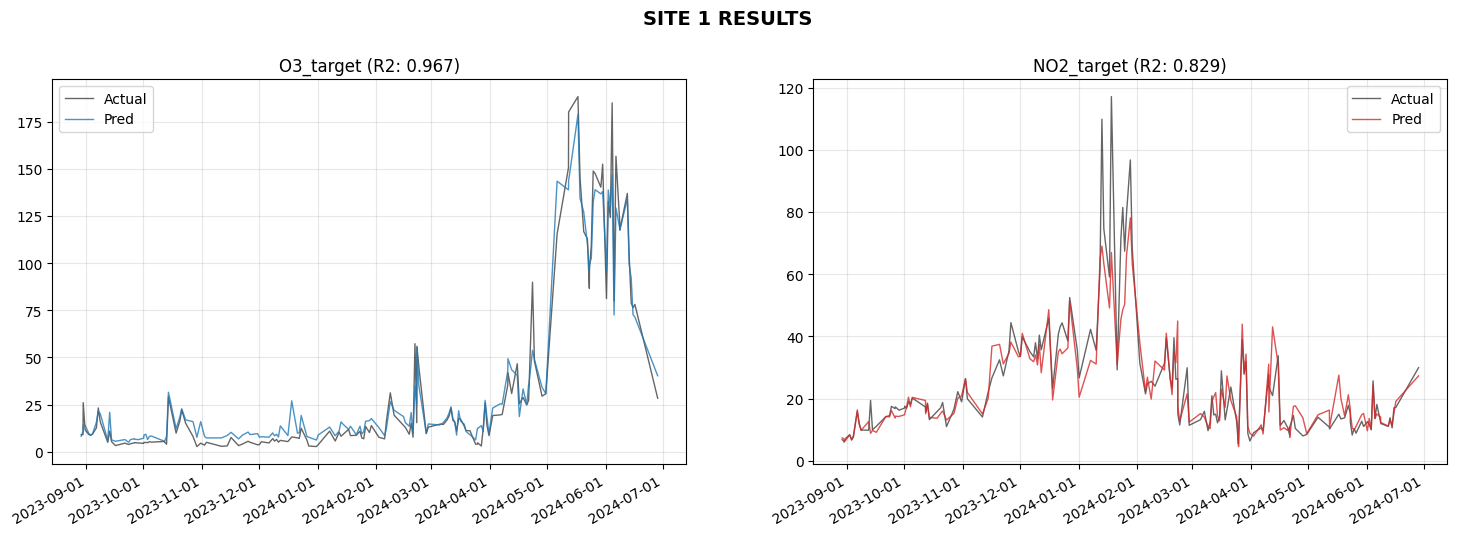



📍 PROCESSING SITE 2
   ------------------------------------------------
   [1] Raw Data Loaded
       - Shape: (25969, 16)
       - Nulls: 75307 total missing values
   [2] Feature Engineering
       - Lags Created: [1, 2, 3, 6, 12, 24]
       - Rows Dropped (Lag NaNs): 25163
       - Final Shape: (806, 29)
   [3] Splitting Data (80/20)
       - Train Range: 2019-07-11 to 2023-06-21 (644 rows)
       - Test Range:  2023-06-30 to 2024-06-16 (162 rows)
       > Target: O3_target    | R2: 0.9267 | MAE: 6.1336 | RMSE: 8.7757
       > Target: NO2_target   | R2: 0.8056 | MAE: 2.9712 | RMSE: 4.3905


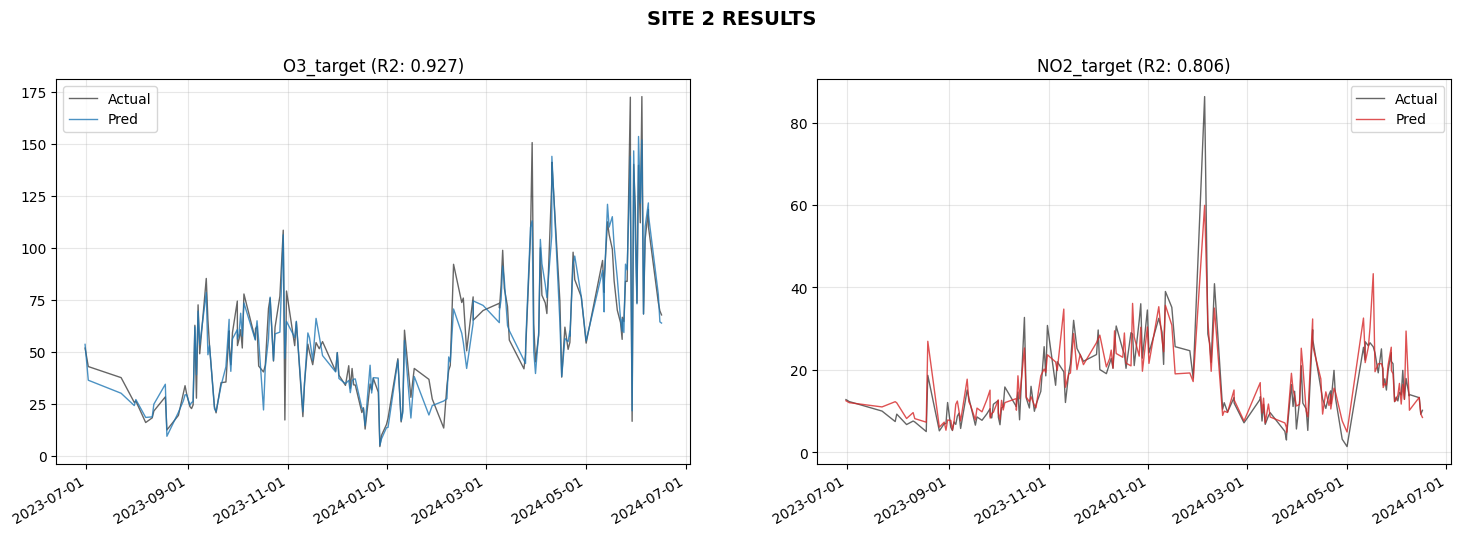



📍 PROCESSING SITE 3
   ------------------------------------------------
   [1] Raw Data Loaded
       - Shape: (21913, 16)
       - Nulls: 63546 total missing values
   [2] Feature Engineering
       - Lags Created: [1, 2, 3, 6, 12, 24]
       - Rows Dropped (Lag NaNs): 21229
       - Final Shape: (684, 29)
   [3] Splitting Data (80/20)
       - Train Range: 2019-07-18 to 2023-05-09 (547 rows)
       - Test Range:  2023-05-10 to 2024-06-16 (137 rows)
       > Target: O3_target    | R2: 0.9536 | MAE: 8.0963 | RMSE: 10.2520
       > Target: NO2_target   | R2: 0.8925 | MAE: 4.3515 | RMSE: 6.9922


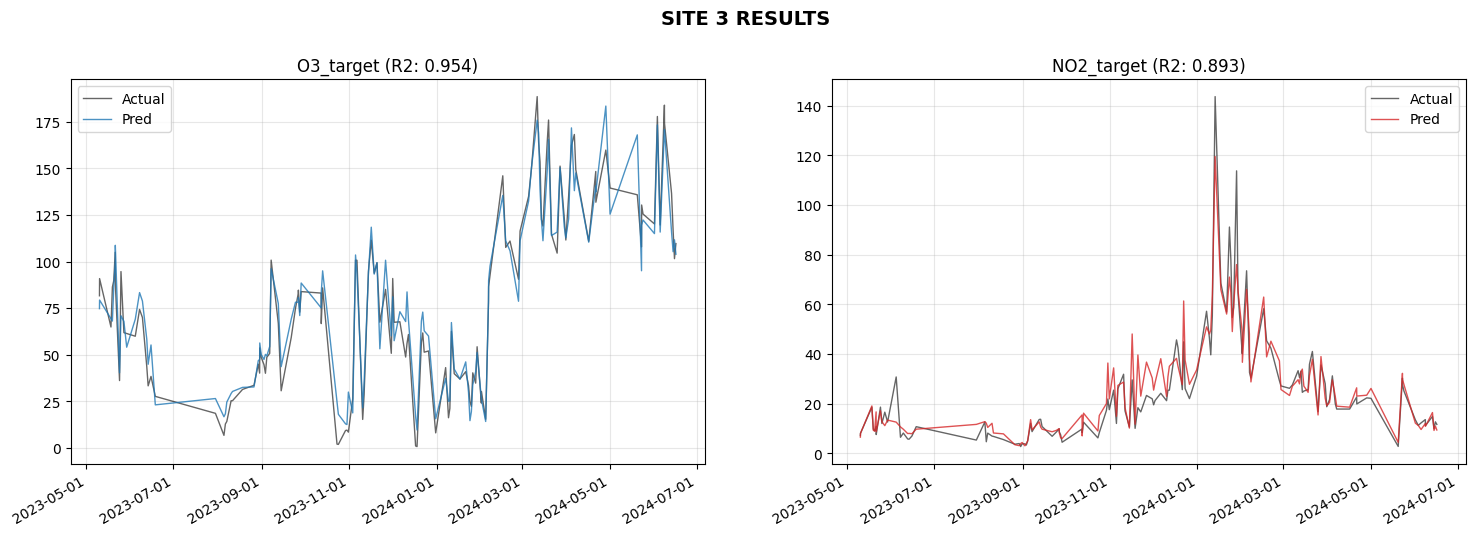



📍 PROCESSING SITE 4
   ------------------------------------------------
   [1] Raw Data Loaded
       - Shape: (24505, 16)
       - Nulls: 71060 total missing values
   [2] Feature Engineering
       - Lags Created: [1, 2, 3, 6, 12, 24]
       - Rows Dropped (Lag NaNs): 23736
       - Final Shape: (769, 29)
   [3] Splitting Data (80/20)
       - Train Range: 2019-07-18 to 2023-08-30 (615 rows)
       - Test Range:  2023-08-31 to 2024-06-28 (154 rows)
       > Target: O3_target    | R2: 0.9428 | MAE: 7.0699 | RMSE: 9.8266
       > Target: NO2_target   | R2: 0.8316 | MAE: 3.5750 | RMSE: 5.9531


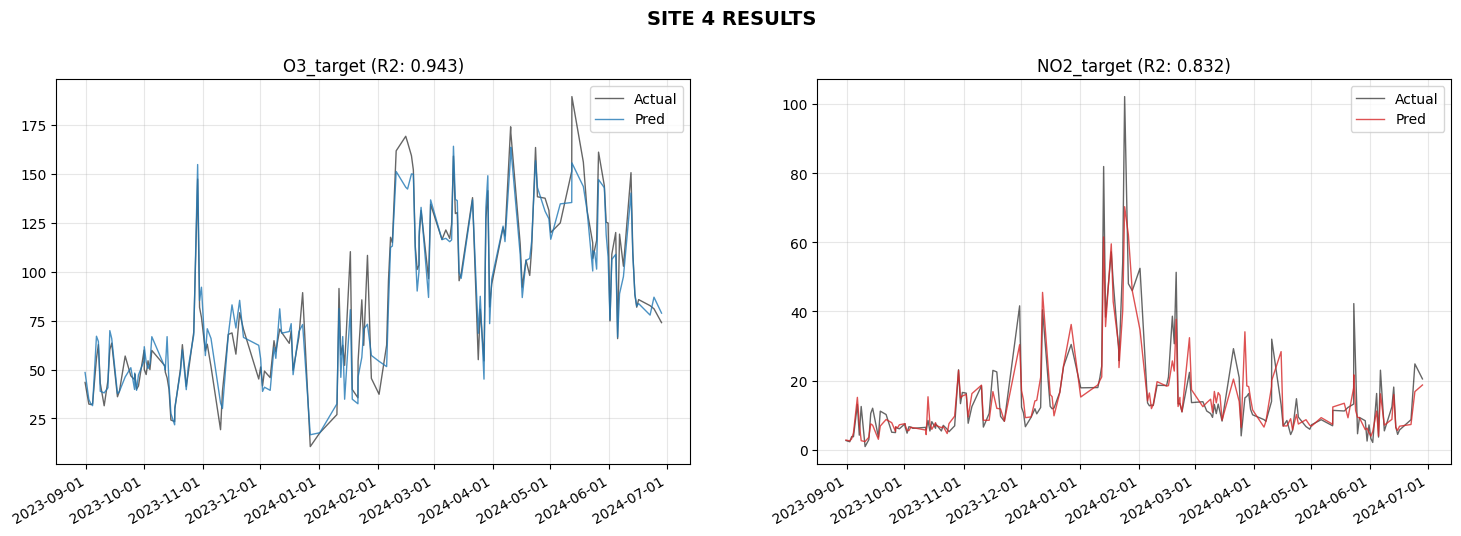



📍 PROCESSING SITE 5
   ------------------------------------------------
   [1] Raw Data Loaded
       - Shape: (25081, 16)
       - Nulls: 72726 total missing values
   [2] Feature Engineering
       - Lags Created: [1, 2, 3, 6, 12, 24]
       - Rows Dropped (Lag NaNs): 24296
       - Final Shape: (785, 29)
   [3] Splitting Data (80/20)
       - Train Range: 2019-07-18 to 2023-07-26 (628 rows)
       - Test Range:  2023-07-30 to 2024-06-22 (157 rows)
       > Target: O3_target    | R2: 0.8856 | MAE: 9.0201 | RMSE: 12.1955
       > Target: NO2_target   | R2: 0.8672 | MAE: 5.0225 | RMSE: 8.1620


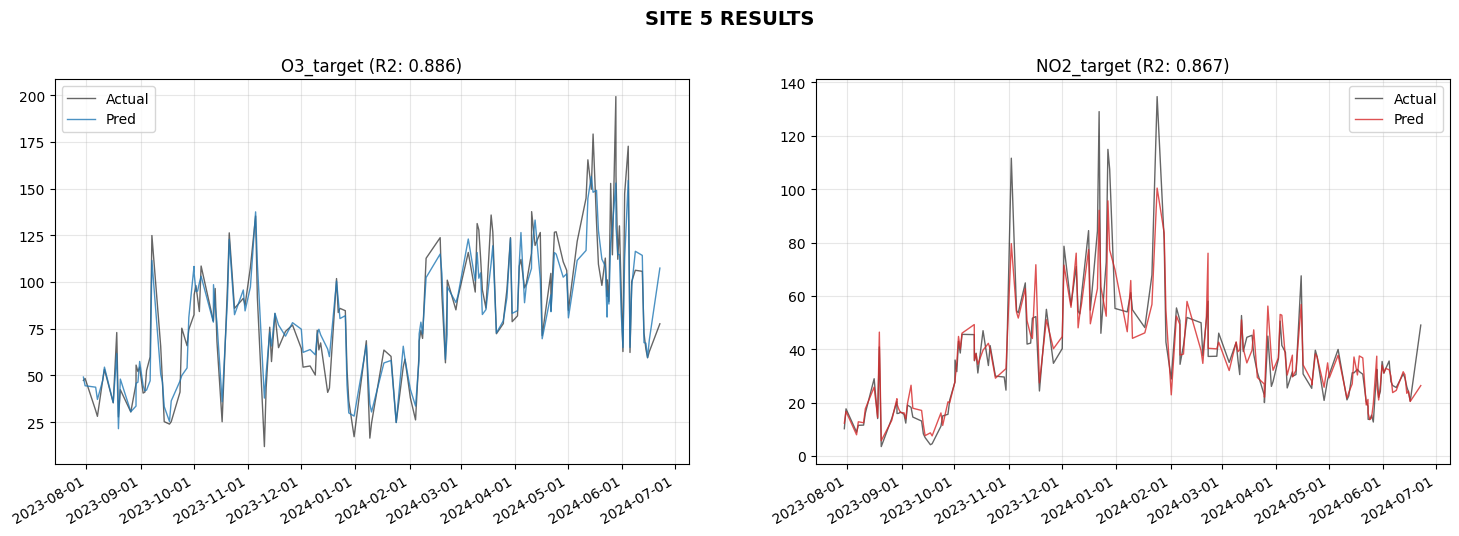



📍 PROCESSING SITE 6
   ------------------------------------------------
   [1] Raw Data Loaded
       - Shape: (26353, 16)
       - Nulls: 76478 total missing values
   [2] Feature Engineering
       - Lags Created: [1, 2, 3, 6, 12, 24]
       - Rows Dropped (Lag NaNs): 25551
       - Final Shape: (802, 29)
   [3] Splitting Data (80/20)
       - Train Range: 2019-07-11 to 2023-07-05 (641 rows)
       - Test Range:  2023-07-06 to 2024-06-22 (161 rows)
       > Target: O3_target    | R2: 0.7088 | MAE: 15.5540 | RMSE: 25.1448
       > Target: NO2_target   | R2: 0.8636 | MAE: 3.6413 | RMSE: 5.7641


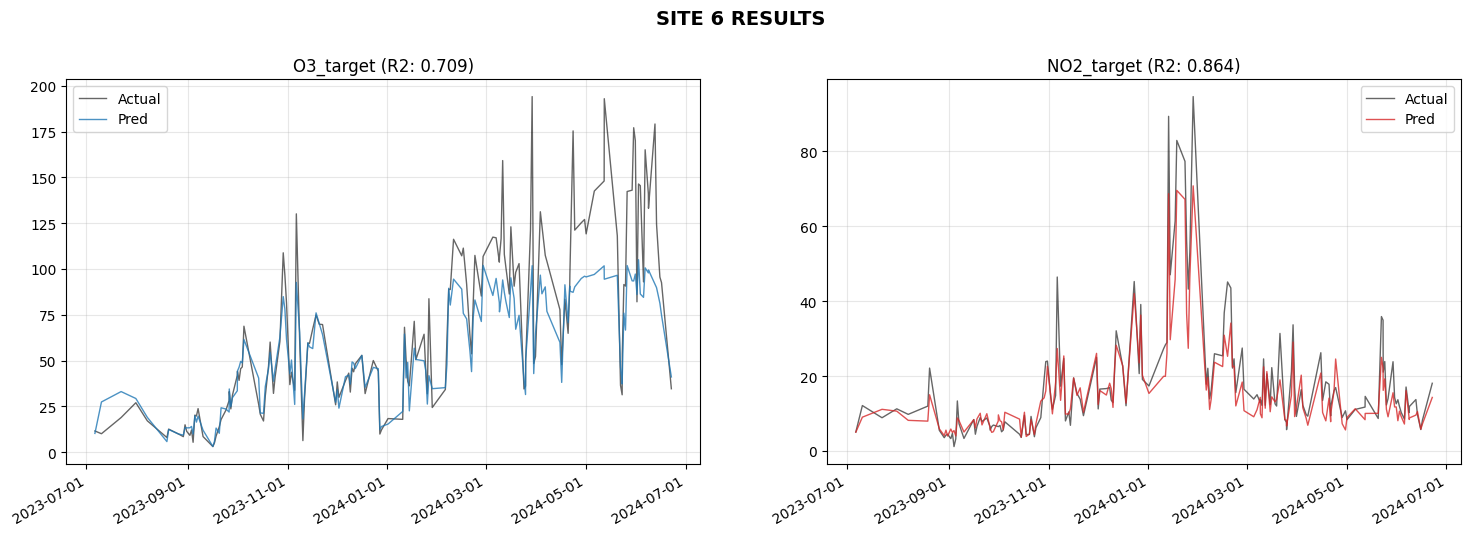



📍 PROCESSING SITE 7
   ------------------------------------------------
   [1] Raw Data Loaded
       - Shape: (22777, 16)
       - Nulls: 66037 total missing values
   [2] Feature Engineering
       - Lags Created: [1, 2, 3, 6, 12, 24]
       - Rows Dropped (Lag NaNs): 22063
       - Final Shape: (714, 29)
   [3] Splitting Data (80/20)
       - Train Range: 2019-07-11 to 2023-07-01 (571 rows)
       - Test Range:  2023-07-02 to 2024-06-16 (143 rows)
       > Target: O3_target    | R2: 0.9427 | MAE: 7.8898 | RMSE: 10.2097
       > Target: NO2_target   | R2: 0.8482 | MAE: 3.0579 | RMSE: 6.2890


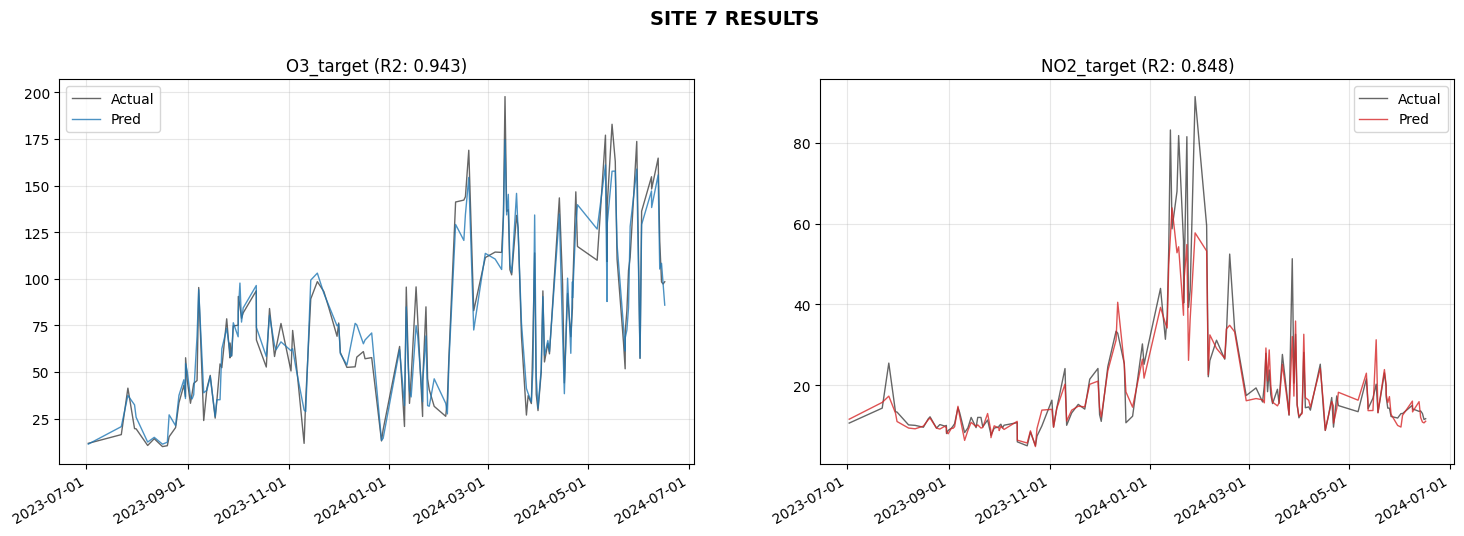

In [10]:
# List to store results for final summary
all_metrics = []

print(f"{'='*100}")
print("STARTING TRAINING PIPELINE")
print(f"{'='*100}\n")

# ITERATE THROUGH SITES
for site_id in range(1, 8):

    # ---------------------------------------------------------
    # 1. DATA LOADING & INSPECTION
    # ---------------------------------------------------------
    file_path = DATA_DIR / f"site_{site_id}_train_data.csv"
    if not file_path.exists():
        print(f"⚠️ Skipping Site {site_id} (File not found)")
        continue

    df = pd.read_csv(file_path)
    print(f"📍 PROCESSING SITE {site_id}")
    print(f"   ------------------------------------------------")
    print(f"   [1] Raw Data Loaded")
    print(f"       - Shape: {df.shape}")
    print(f"       - Nulls: {df.isnull().sum().sum()} total missing values")

    # ---------------------------------------------------------
    # 2. PREPROCESSING
    # ---------------------------------------------------------
    df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
    df = df.sort_values('datetime').reset_index(drop=True)

    # Create Lags
    df_processed = create_lag_features(df, TARGETS, LAGS)

    # Drop NaNs
    original_len = len(df_processed)
    df_processed = df_processed.dropna().reset_index(drop=True)
    dropped_len = original_len - len(df_processed)

    print(f"   [2] Feature Engineering")
    print(f"       - Lags Created: {LAGS}")
    print(f"       - Rows Dropped (Lag NaNs): {dropped_len}")
    print(f"       - Final Shape: {df_processed.shape}")

    # ---------------------------------------------------------
    # 3. TRAIN/TEST SPLIT
    # ---------------------------------------------------------
    train_size = int(len(df_processed) * 0.80)
    train_df = df_processed.iloc[:train_size]
    test_df = df_processed.iloc[train_size:]

    print(f"   [3] Splitting Data (80/20)")
    print(f"       - Train Range: {train_df['datetime'].min().date()} to {train_df['datetime'].max().date()} ({len(train_df)} rows)")
    print(f"       - Test Range:  {test_df['datetime'].min().date()} to {test_df['datetime'].max().date()} ({len(test_df)} rows)")

    # Prepare Plotting Area for this Site
    fig, axes = plt.subplots(1, 2, figsize=(18, 5))
    plt.subplots_adjust(wspace=0.2)
    fig.suptitle(f"SITE {site_id} RESULTS", fontsize=14, fontweight='bold', y=1.02)

    # ---------------------------------------------------------
    # 4. TRAINING & EVALUATION LOOP (Per Target)
    # ---------------------------------------------------------
    for idx, target in enumerate(TARGETS):
        # Define Features
        feature_cols = FORECAST_FEATURES + [col for col in df_processed.columns if 'lag' in col]

        # Prepare XY
        X_train = train_df[feature_cols]
        y_train = train_df[target]
        X_test = test_df[feature_cols]
        y_test = test_df[target]

        # Train
        model = xgb.XGBRegressor(**XGB_PARAMS)
        model.fit(
            X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=False
        )

        # Predict
        y_pred = model.predict(X_test)

        # Metrics
        m = calculate_metrics(y_test, y_pred, f"site_{site_id}", target)
        all_metrics.append(m)

        print(f"       > Target: {target:<12} | R2: {m['R2']:.4f} | MAE: {m['MAE']:.4f} | RMSE: {m['RMSE']:.4f}")

        # Save Model
        model.save_model(ARTIFACT_DIR / f"site_{site_id}_{target}_xgb.json")

        # ---------------------------------------------------------
        # 5. VISUALIZATION (Inline)
        # ---------------------------------------------------------
        ax = axes[idx]
        dates = test_df['datetime']

        ax.plot(dates, y_test, color='black', alpha=0.6, label='Actual', linewidth=1)
        ax.plot(dates, y_pred, color='#d62728' if 'NO2' in target else '#1f77b4', alpha=0.8, label='Pred', linewidth=1)

        ax.set_title(f"{target} (R2: {m['R2']:.3f})")
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
        ax.legend()
        ax.grid(alpha=0.3)

    plt.show() # Show graph immediately after site is done
    print("\n") # Spacer

In [12]:
results_df = pd.DataFrame(all_metrics)

print(f"{'='*80}")
print("FINAL SUMMARY REPORT")
print(f"{'='*80}")
print(results_df.round(4).to_string(index=False))

print(f"\n{'='*80}")
print("AVERAGE METRICS ACROSS ALL 7 SITES")
print(f"{'='*80}")

# Group by Target and calculate mean of numeric columns
avg_metrics = results_df.groupby('Target')[['R2', 'MAE', 'RMSE', 'Bias']].mean().reset_index()
print(avg_metrics.round(4).to_string(index=False))

# Save to CSV
results_df.to_csv(ARTIFACT_DIR / "final_metrics_report.csv", index=False)
avg_metrics.to_csv(ARTIFACT_DIR / "average_metrics_summary.csv", index=False)
print(f"\n📄 Reports saved to: {ARTIFACT_DIR}")

FINAL SUMMARY REPORT
  Site     Target     MAE    RMSE     R2     Bias
site_1  O3_target  5.3089  8.2987 0.9666   1.1753
site_1 NO2_target  4.2217  7.8989 0.8295  -1.1941
site_2  O3_target  6.1336  8.7757 0.9267  -0.8103
site_2 NO2_target  2.9712  4.3905 0.8056   0.4103
site_3  O3_target  8.0963 10.2520 0.9536   1.4206
site_3 NO2_target  4.3515  6.9922 0.8925   1.0005
site_4  O3_target  7.0699  9.8266 0.9428  -1.6801
site_4 NO2_target  3.5750  5.9531 0.8316  -0.5272
site_5  O3_target  9.0201 12.1955 0.8856  -1.0830
site_5 NO2_target  5.0225  8.1620 0.8672  -0.3061
site_6  O3_target 15.5540 25.1448 0.7088 -12.2931
site_6 NO2_target  3.6413  5.7641 0.8636  -2.4799
site_7  O3_target  7.8898 10.2097 0.9427  -0.6186
site_7 NO2_target  3.0579  6.2890 0.8482  -1.3783

AVERAGE METRICS ACROSS ALL 7 SITES
    Target     R2    MAE    RMSE    Bias
NO2_target 0.8483 3.8344  6.4928 -0.6392
 O3_target 0.9038 8.4390 12.1004 -1.9842

📄 Reports saved to: artifacts/xgb_models
